## EDA

In [ ]:
!pip install psycopg2-binary

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath(''), os.pardir))
sys.path.append(PROJECT_ROOT)
import helpers as db

In [2]:
print(db.connect_to_db())

<cursor object at 0x7f9909f25a90; closed: 0>


### Question 1: For a given country, what is the trend of their average temperature?

In [ ]:
cursor = db.connect_to_db()

In [ ]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Afghanistan';")

In [ ]:
afghanistan_data = cursor.fetchall()

In [ ]:
df_country = pd.DataFrame(afghanistan_data, columns=[desc[0] for desc in cursor.description])

In [ ]:
country_q1 = "Afghanistan"
df_country = df_country.sort_values(by=["dt"], ascending=True)
df_country = df_country.replace(to_replace="", value=np.nan, regex=True)
df_country = df_country.dropna()
df_country["year"] = df_country["dt"].str[:4].astype(int)
df_country["averagetemperature"] = df_country["averagetemperature"].astype(float)
df_country["temperature"] = df_country.groupby("year")["averagetemperature"].transform(
    "mean"
)

alt.Chart(df_country).mark_line().encode(
    x=alt.X("year", title="Year", axis=alt.Axis(format="d")),
    y=alt.Y("temperature", title="Average Temperature (Celsius)", scale=alt.Scale(zero=False)),
).properties(title="Average Temperature in " + country_q1)



In [ ]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Europe';")
europe_data = cursor.fetchall()
df_country_1 = pd.DataFrame(europe_data, columns=[desc[0] for desc in cursor.description])

In [ ]:
country = 'Europe'
df_country_1 = df_country_1.sort_values(by=['dt'], ascending=True)
df_country_1 = df_country_1.replace(to_replace='', value = np.nan,regex=True)
df_country_1 = df_country_1.dropna()
df_country_1['year'] = df_country_1['dt'].str[:4].astype(int)
df_country_1['averagetemperature'] = df_country_1['averagetemperature'].astype(float)
df_country_1['temperature'] = df_country_1.groupby('year')['averagetemperature'].transform('mean')

alt.Chart(df_country_1).mark_line().encode(
    x=alt.X("year", title="Year", axis=alt.Axis(format="d")),
    y=alt.Y("temperature", title="Average Temperature (Celsius)", scale=alt.Scale(zero=False)),
).properties(title="Average Temperature in " + country)

In [ ]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'India';")
india_data = cursor.fetchall()
df_country_2 = pd.DataFrame(india_data, columns=[desc[0] for desc in cursor.description])

In [ ]:
country = 'India'
df_country_2 = df_country_2.sort_values(by=['dt'], ascending=True)
df_country_2 = df_country_2.replace(to_replace='', value = np.nan,regex=True)
df_country_2 = df_country_2.dropna()
df_country_2['year'] = df_country_2['dt'].str[:4].astype(int)
df_country_2['averagetemperature'] = df_country_2['averagetemperature'].astype(float)
df_country_2['temperature'] = df_country_2.groupby('year')['averagetemperature'].transform('mean')

alt.Chart(df_country_2).mark_line().encode(
    x=alt.X("year", title="Year", axis=alt.Axis(format="d")),
    y=alt.Y("temperature", title="Average Temperature (Celsius)", scale=alt.Scale(zero=False)),
).properties(title="Average Temperature in " + country)

### Question 2: For a given year and a given country, what is the max/min temperature?

In [ ]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Norway';")
norway_data = cursor.fetchall()
df_country_3 = pd.DataFrame(norway_data, columns=[desc[0] for desc in cursor.description])

In [ ]:
year_q2 = 2000
country_q2 = 'Norway'
df_country_3 = df_country_3.sort_values(by=['dt'], ascending=True)
df_country_3 = df_country_3.replace(to_replace='', value = np.nan,regex=True)
df_country_3 = df_country_3.dropna()
df_country_3['year'] = df_country_3['dt'].str[:4].astype(int)
df_country_3['averagetemperature'] = df_country_3['averagetemperature'].astype(float)
max = df_country_3[df_country_3["year"] == year_q2]['averagetemperature'].max()
min = df_country_3[df_country_3["year"] == year_q2]['averagetemperature'].min()
mean = df_country_3[df_country_3["year"] == year_q2]['averagetemperature'].mean()
plt.bar(["Max", "Min", "Mean"], [max, min, mean])
plt.title("Temperature of " + country_q2 + ' in ' + str(year_q2))
for index, value in enumerate([max, min, mean]):
    plt.text(index, value, np.round(value, 2))
plt.show()

### Question 3: For a given year, which city has the highest/lowest temperature on average in the US?

In [ ]:
cursor.execute("SELECT * FROM import.globaltemperaturesbymajorcity where country = 'United States';")
us_data = cursor.fetchall()
df_country_4 = pd.DataFrame(us_data, columns=[desc[0] for desc in cursor.description])


In [ ]:
year_q3 = 2010
country_q3 = 'United States'
df_country_4 = df_country_4.sort_values(by=['dt'], ascending=True)
df_country_4 = df_country_4.replace(to_replace='', value = np.nan,regex=True)
df_country_4 = df_country_4.dropna()
df_country_4['year'] = df_country_4['dt'].str[:4].astype(int)
df_country_4['averagetemperature'] = df_country_4['averagetemperature'].astype(float)
df_country_4['temperature'] = df_country_4.groupby(['year', 'city'])['averagetemperature'].transform('mean')
highest = df_country_4[df_country_4["year"] == year_q3].sort_values(by=['temperature'], ascending=False).head(1)
lowest = df_country_4[df_country_4["year"] == year_q3].sort_values(by=['temperature'], ascending=True).head(1)
highest_city = highest['city'].values[0]
lowest_city = lowest['city'].values[0]
print(str(highest_city) + ' had the highest temperature in ' + str(year_q3) + ' on average.')
print(str(lowest_city) + ' had the lowest temperature in ' + str(year_q3) + ' on average.')

### Question 4: For a given country, what is the initial and the most recent temperature?

In [3]:
cursor = db.connect_to_db()
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Thailand';")
thailand_data = cursor.fetchall()
df_country_5 = pd.DataFrame(thailand_data, columns=[desc[0] for desc in cursor.description])
df_country_5 = df_country_5.sort_values(by=['dt'], ascending=True)
df_country_5 = df_country_5.replace(to_replace='', value = np.nan,regex=True)
df_country_5 = df_country_5.dropna()
df_country_5['year'] = df_country_5['dt'].str[:4].astype(int)
df_country_5['month'] = df_country_5['dt'].str[5:7].astype(int)
df_country_5['averagetemperature'] = df_country_5['averagetemperature'].astype(float)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27183D-01    |proj g|=  5.11552D-01

At iterate    5    f=  4.06078D-01    |proj g|=  4.97345D-02

At iterate   10    f=  3.98032D-01    |proj g|=  1.39846D-02


 This problem is unconstrained.



At iterate   15    f=  3.93487D-01    |proj g|=  9.08082D-03

At iterate   20    f=  3.92823D-01    |proj g|=  2.51551D-03

At iterate   25    f=  3.92776D-01    |proj g|=  1.00872D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     52      1     0     0   4.025D-03   3.928D-01
  F =  0.39277342657978431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


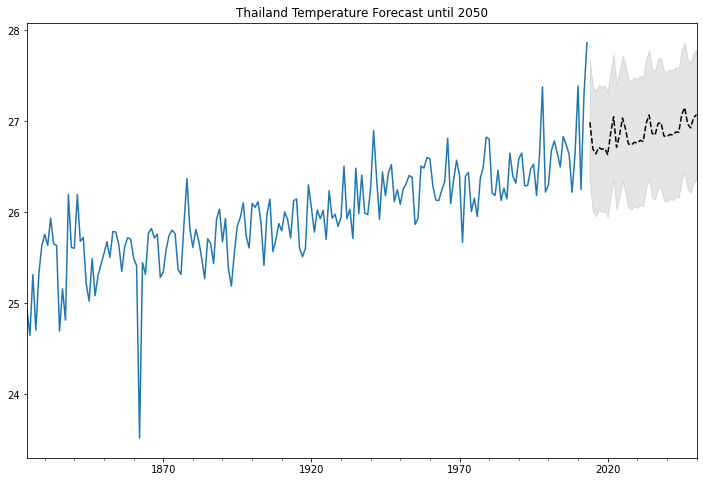

In [28]:
import statsmodels.api as sm

timeseriesdata = df_country_5.groupby('year')['averagetemperature'].mean()
timeseriesdata.index = pd.period_range('1824', '2013', freq='Y')
endog = timeseriesdata
mod = sm.tsa.statespace.SARIMAX(endog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
res = mod.fit()
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Thailand Temperature Forecast until 2050')
endog.loc['1824':].plot(ax=ax)
fcast = res.get_forecast('2050').summary_frame()
fcast['mean'].plot(ax=ax, style='k--', label='Forecast')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

In [ ]:
country_q4 = 'Thailand'
df_country_5 = df_country_5.sort_values(by=['dt'], ascending=True)
df_country_5 = df_country_5.replace(to_replace='', value = np.nan,regex=True)
df_country_5 = df_country_5.dropna()
df_country_5['year'] = df_country_5['dt'].str[:4].astype(int)
df_country_5['month'] = df_country_5['dt'].str[5:7].astype(int)
df_country_5['averagetemperature'] = df_country_5['averagetemperature'].astype(float)
initial = df_country_5.loc[0, 'averagetemperature']
initial_month = str(df_country_5.loc[0, 'year']) + '-' + str(df_country_5.loc[0, 'month'])
recent = df_country_5.iloc[-1]['averagetemperature']
recent_month = str(df_country_5.iloc[-1]['year']) + '-' + str(df_country_5.iloc[-1]['month'])
plt.bar([initial_month, recent_month], [initial, recent])
plt.title("Temperature of " + country_q4 + ' from ' + str(initial_month[:4]) + ' to ' + str(recent_month[:4]))
for index, value in enumerate([initial, recent]):
    plt.text(index, value, np.round(value, 2))
plt.show()